### Load the data set

In [6]:
from sklearn .datasets import fetch_california_housing
import pandas as pd

#load the datset
housing=fetch_california_housing(as_frame=True)
df=housing.frame

#shows the 1st five rows
df.head() 




,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## EDA 
Helps us understand dataset and relationship bw features 

In [10]:
print('Dataset Shape:', df.shape)
print('\nDataset info:')
print(df.info())
print('\nSummary Statistics:')
print(df.describe())

Dataset Shape: (20640, 9)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Summary Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min    

## Data Visualization


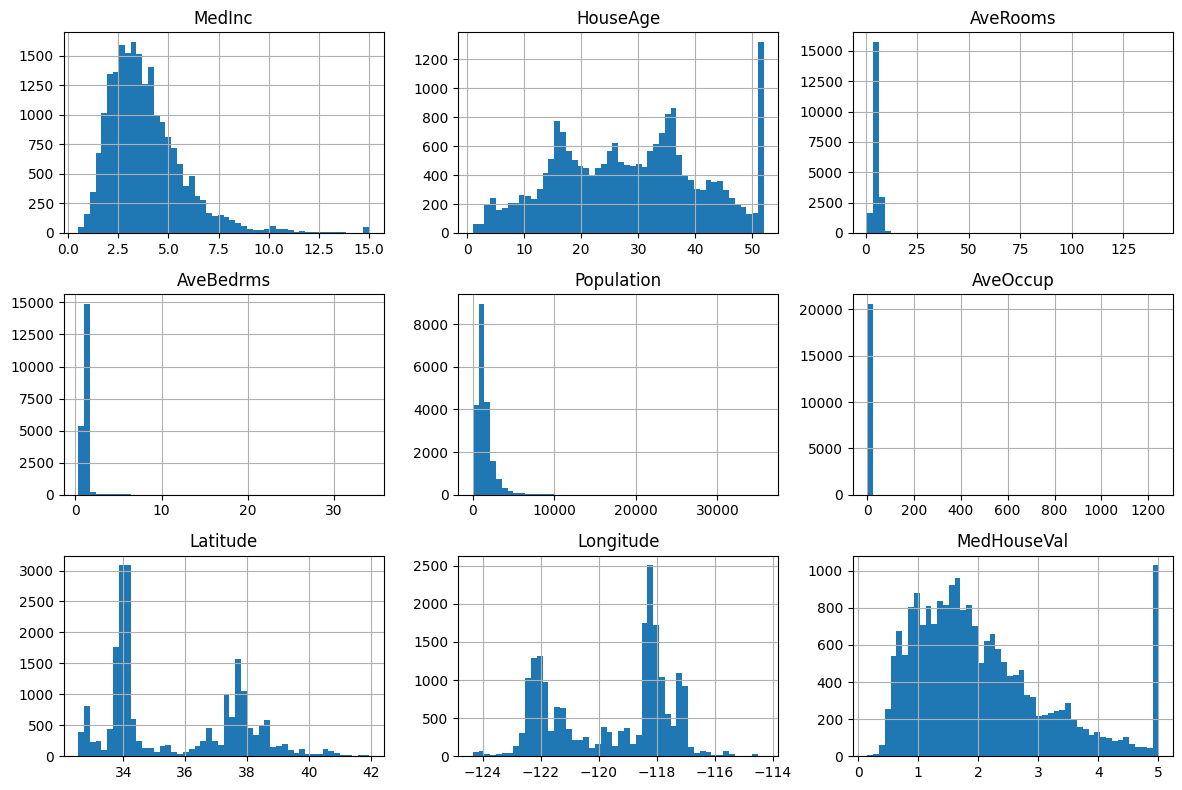

In [14]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(12,8))
plt.tight_layout()
plt.show()

## Data Preprocessing


*Checking for any missing vales*

In [23]:
#lets check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


Training and Test Split


In [27]:
from sklearn.model_selection import train_test_split

#seperate features and target
x=df.drop('MedHouseVal',axis=1)  #features(input)
y=df['MedHouseVal']              #target(output)

#splitting into training and testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#print shapes 
print("X Train Shape",x_train.shape)
print("X Test Shape",x_test.shape)
print("Y Train Shape",y_train.shape)
print("Y Test Shape",y_test.shape)


X Train Shape (16512, 8)
X Test Shape (4128, 8)
Y Train Shape (16512,)
Y Test Shape (4128,)


#### we will apply linear regression model

In [30]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

#train the model on training data
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
coefficients = pd.DataFrame(model.coef_, x.columns, columns=["Coefficient"])
print(coefficients)


            Coefficient
MedInc         0.448675
HouseAge       0.009724
AveRooms      -0.123323
AveBedrms      0.783145
Population    -0.000002
AveOccup      -0.003526
Latitude      -0.419792
Longitude     -0.433708


## Model Evaluation

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test data
y_pred = model.predict(x_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 0.5558915986952435
Mean Absolute Error (MAE): 0.5332001304956557
R-squared (R²): 0.5757877060324514


#### Corelation analysis (heatmap)

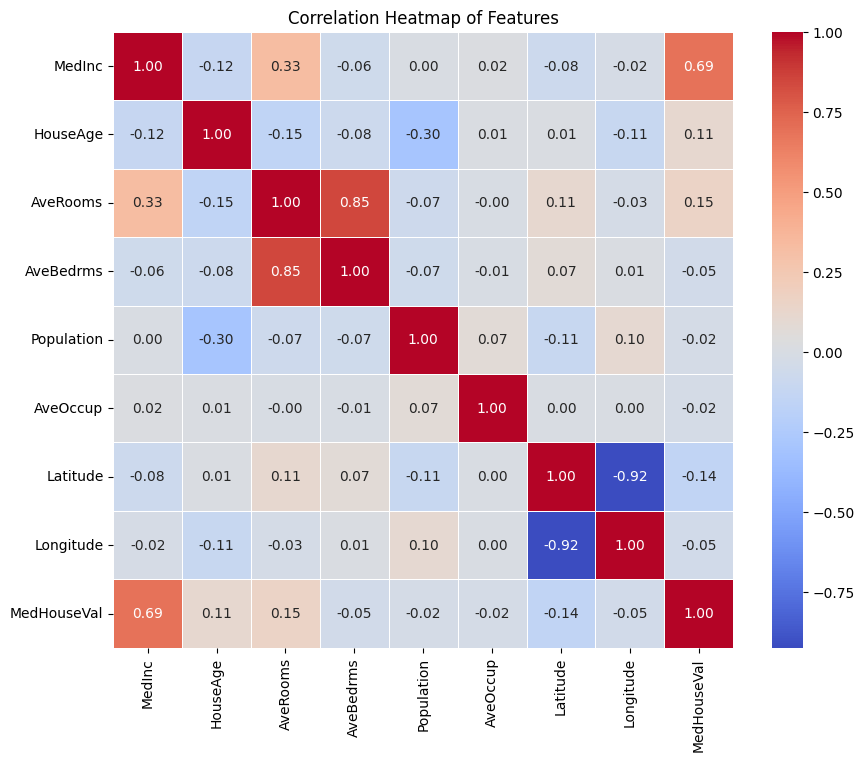

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


# Model Interpretation

| Feature                  | Coefficient | Interpretation                                                                                               |
| ------------------------ | ----------- | ------------------------------------------------------------------------------------------------------------ |
| **MedInc**               | +0.449      | Higher median income is strongly associated with higher house values.                                        |
| **AveBedrms**            | +0.783      | More bedrooms (on average) tends to slightly increase house value, but may be correlated with house size.    |
| **AveRooms**             | -0.123      | Surprisingly, more rooms slightly **decrease** house value, possibly due to multicollinearity with bedrooms. |
| **HouseAge**             | +0.010      | Older houses have a minimal positive impact on value.                                                        |
| **Latitude**             | -0.420      | Houses in more northern areas tend to be less expensive.                                                     |
| **Longitude**            | -0.434      | Houses farther west (toward the coast) tend to be more expensive.                                            |
| **Population, AveOccup** | Near 0      | These features have very little effect on price in this linear model.                                        |


## CONCLUSION

In this project, I built a Linear Regression model to predict median house values in California using features such as income, house age, and location. Here's a summary of the key steps and insights:

- Performed data cleaning and confirmed there were no missing values.

- Explored feature relationships using correlation heatmaps.

- Trained a Linear Regression model and analyzed coefficients to interpret feature impact.

- Evaluated the model using standard regression metrics:

R² Score: 0.576

Mean Squared Error (MSE): ~0.556

Mean Absolute Error (MAE): ~0.533

Insights:
- Median income is the most significant driver of housing prices.

- Geographic features (latitude and longitude) have a meaningful influence.

- Model performance is reasonable but leaves room for improvement (R² ≈ 57%).